<a href="https://colab.research.google.com/github/Muhaimin008/Vegeable-Shelf-life-Prediction/blob/main/Thermal_Data_To_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/For thermal data plot/alu-variables - Sheet1(2).csv")
df.head(2)

,date,tmp1,tmp2,tmp3,tmp4
0,Tuesday-March-26-2024-02:03:23,27.5828.6029.3329.6729.5028.6928.7529.0029.332...,27.5828.8529.3329.4929.5030.1228.7529.3329.332...,29.2729.6329.7729.2029.4430.0730.3330.6430.502...,29.2729.0029.7729.9129.4429.8430.3330.8730.503...
1,Tuesday-March-26-2024-02:07:02,-79.750.00-75.070.00-74.040.00-71.790.00-71.00...,28.080.0028.320.0029.070.0028.440.0029.430.002...,-73.640.00-70.030.00-68.770.00-66.390.00-65.63...,29.480.0029.700.0029.760.0030.100.0030.420.002...


In [ ]:
df1= np.array(df.tmp1[0])
thermal_data= df.tmp1[0]
df1

array('27.5828.6029.3329.6729.5028.6928.7529.0029.3329.3429.5529.3029.2529.2830.7329.5529.1229.2629.2829.5728.9629.0028.7629.7429.0329.4429.0829.0928.9728.8228.6529.9029.1427.9129.2328.6129.5228.9629.3829.3029.2929.2529.3429.6029.5729.8029.4928.9229.0529.5629.7829.4529.6829.6829.6929.2729.5529.2729.5829.3429.5129.0029.8029.2528.9728.8129.1829.1329.2829.5029.5629.4229.1229.2829.3629.5729.5329.5029.2829.4329.4229.8230.0429.7129.7029.2429.3329.5529.0829.8529.1529.7128.9828.9628.5929.1729.3629.1429.2629.4629.8329.0430.0029.4129.7929.1829.6329.5229.5029.6029.6429.3029.9729.5329.3829.3529.5229.5129.7929.6129.3129.4829.9129.2229.0029.4329.2929.1728.8328.3329.3629.5729.3829.2429.5729.4329.2929.6129.5629.8329.3729.2129.4629.6729.7729.5829.9429.0129.8429.1829.1929.9129.3429.8229.3330.0129.4429.1329.2129.2828.7928.5228.9429.1829.4729.0729.7629.4929.6529.5629.9829.4129.7530.1229.7029.7029.8229.6430.3529.4929.7929.6330.3029.4829.3229.5029.3329.5029.1129.2829.7629.0929.2228.5129.5629.5029.6629.0029.

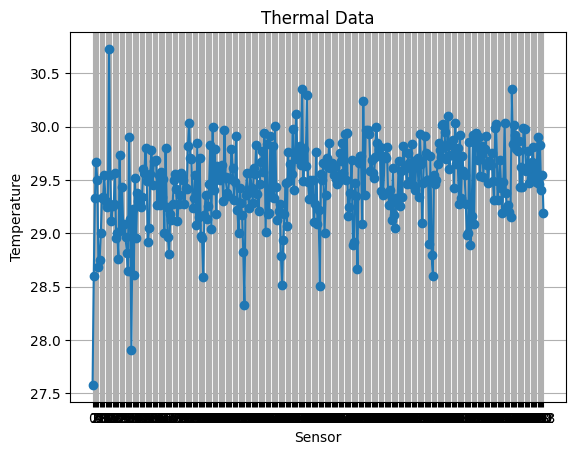

In [ ]:
import matplotlib.pyplot as plt

# Given thermal data
thermal_data1 = df.tmp1[0]
# thermal_data2 = df.tmp2[0]
# thermal_data3 =df.tmp3[0]
# thermal_data4 =df.tmp4[0]

# Split the data into individual readings for each sensor
sensor_data = [thermal_data1[i:i+5] for i in range(0, len(thermal_data), 5)]

# Convert the readings to floating-point numbers
sensor_data_float = [float(reading) for reading in sensor_data]

# Plot the thermal data
plt.plot(sensor_data_float, marker='o', linestyle='-')
plt.title('Thermal Data')
plt.xlabel('Sensor')
plt.ylabel('Temperature')
plt.xticks(range(len(sensor_data_float)))
plt.grid(True)

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


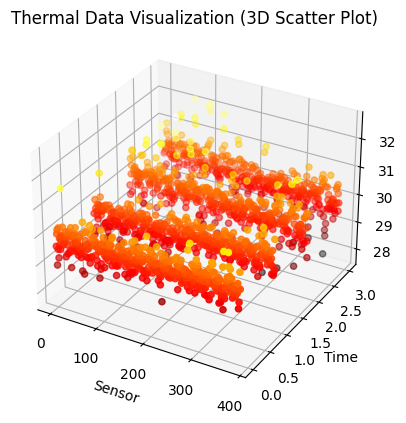

In [ ]:
!pip install cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import re

# Given thermal data for four sets
thermal_data_1 = df.tmp1[150]
thermal_data_2 = df.tmp2[150]
thermal_data_3 =df.tmp3[150]
thermal_data_4 =df.tmp4[150]

# Function to split and convert thermal data
def process_thermal_data(thermal_data):
    # Use regular expression to split the data into individual temperature readings
    readings = re.findall(r'\d+\.\d{2}', thermal_data)
    # Convert readings to float, handle invalid entries and filter out-of-range values
    sensor_data = []
    for reading in readings:
        try:
            temperature = float(reading)
            if 0.01 <= temperature <= 99:
                sensor_data.append(temperature)
        except ValueError:
            print("Invalid data:", reading)
            sensor_data.append(np.nan)
    return sensor_data

# Process each set of thermal data
thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_1, thermal_data_2, thermal_data_3, thermal_data_4]]

# Find the maximum length among the thermal data arrays
max_length = max(len(data) for data in thermal_data_arrays)

# Pad each array with NaN values to make them equal length
padded_arrays = [np.pad(data, (0, max_length - len(data)), 'constant', constant_values=np.nan) for data in thermal_data_arrays]

# Stack the arrays vertically to create a 2D array
concatenated_data_2d = np.vstack(padded_arrays)

# # Create a heatmap using seaborn
# sns.heatmap(concatenated_data_2d, cmap='hot', vmin=27, vmax=30, cbar_kws={'label': 'Temperature'})
# plt.title('Thermal Image')
# plt.xlabel('Sensor')
# plt.ylabel('Time')
# plt.show()

# Create meshgrid for 3D scatter plot
x, y = np.meshgrid(np.arange(concatenated_data_2d.shape[1]), np.arange(concatenated_data_2d.shape[0]))

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = concatenated_data_2d.flatten()

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='hot', marker='o')
ax.set_xlabel('Sensor')
ax.set_ylabel('Time')
ax.set_zlabel('Temperature')
plt.title('Thermal Data Visualization (3D Scatter Plot)')
plt.show()

In [ ]:
flattened_data = [item for sublist in thermal_data_arrays for item in sublist]
len(flattened_data)
32*48

1536

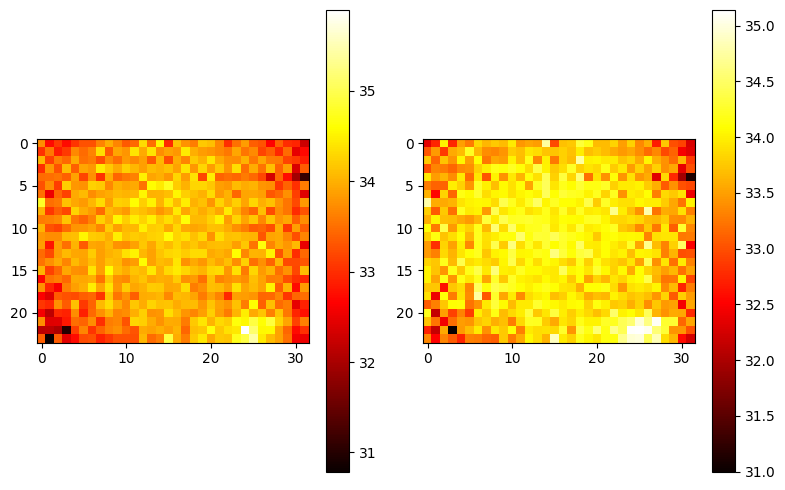

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Given thermal data for four sets
thermal_data_1 = df.tmp1[605]+ df.tmp3[605]
thermal_data_2 = df.tmp2[605]+ df.tmp4[605]


# Function to split and convert thermal data
def process_thermal_data(thermal_data):
    # Use regular expression to split the data into individual temperature readings
    readings = re.findall(r'\d+\.\d{2}', thermal_data)
    # Convert readings to float, handle invalid entries and filter out-of-range values
    sensor_data = []
    for reading in readings:
        try:
            temperature = float(reading)
            if 0.01 <= temperature <= 99:
                sensor_data.append(temperature)
        except ValueError:
            print("Invalid data:", reading)
            sensor_data.append(np.nan)
    return sensor_data


# Process each set of thermal data
thermal_data_arrays1 = [process_thermal_data(data) for data in [thermal_data_1]]
thermal_data_arrays2 = [process_thermal_data(data) for data in [thermal_data_2]]
# Assuming you have your 768 data points in a list or array called 'data'
# Reshape the data into a 24x32 array

thermal_data_arrays3= np.array(thermal_data_arrays1)
thermal_data_arrays4= np.array(thermal_data_arrays2)


thermal_data_arrays5= np.array(thermal_data_arrays3[0])
thermal_data_arrays6= np.array(thermal_data_arrays4[0])



image_data1 = np.array(thermal_data_arrays5).reshape(24, 32)
image_data2 = np.array(thermal_data_arrays6).reshape(24, 32)

###Plotting potato neaar thermal sensor

plt.figure(figsize=(8, 5))
# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(image_data1, cmap='hot', interpolation='nearest')
plt.colorbar()
# plt.show()
plt.subplot(1, 2, 2)
plt.imshow(image_data2, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(680, 5)

(24, 32)
(24, 32)


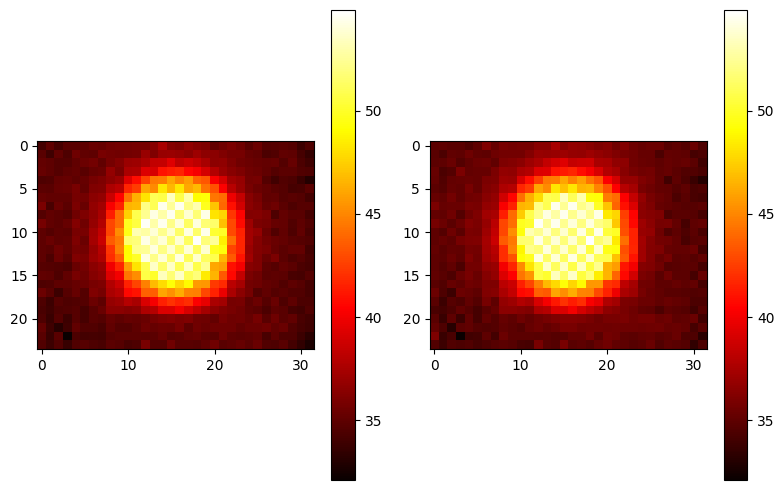

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import regex as re

df = pd.read_csv("/content/drive/MyDrive/For thermal data plot/alu-variables - Sheet1(2).csv")
# Given thermal data for four sets
thermal_data_1 = df.tmp1[615]+ df.tmp3[615]
thermal_data_2 = df.tmp2[615]+ df.tmp4[615]

# Function to split and convert thermal data
def process_thermal_data(thermal_data):
    # Use regular expression to split the data into individual temperature readings
    readings = re.findall(r'\d+\.\d{2}', thermal_data)
    # Convert readings to float, handle invalid entries and filter out-of-range values
    sensor_data = []
    for reading in readings:
        try:
            temperature = float(reading)
            if 0.01 <= temperature <= 99:
                sensor_data.append(temperature)
            else:
                print(temperature)
        except ValueError:
            print("Invalid data:", reading)
            sensor_data.append(np.nan)
    return sensor_data

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_1]][0]
arr1 = np.array(thermal_data_arrays).reshape(24,32)

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_2]][0]
arr2 = np.array(thermal_data_arrays).reshape(24,32)

print(arr1.shape)
print(arr2.shape)

plt.figure(figsize=(8, 5))
# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(arr1, cmap='hot', interpolation='nearest')
plt.colorbar()
# plt.show()
plt.subplot(1, 2, 2)
plt.imshow(arr2, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale

plt.tight_layout()
plt.show()

(24, 32)
(24, 32)


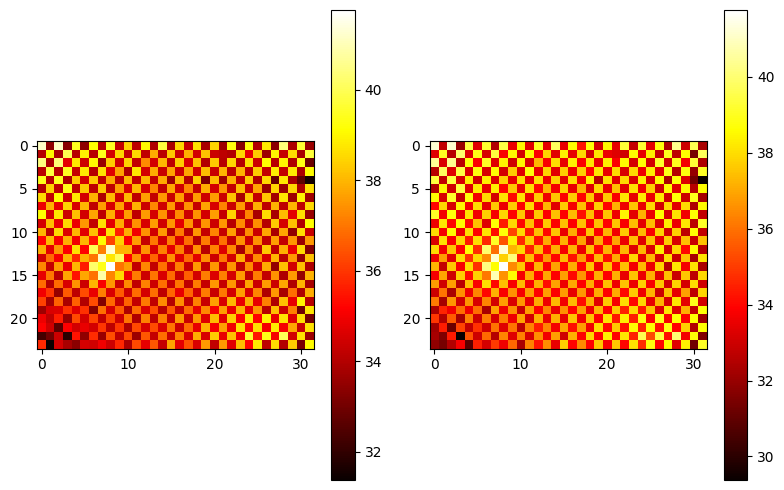

In [ ]:
thermal_data_1 = df.tmp1[590]+ df.tmp3[590]
thermal_data_2 = df.tmp2[590]+ df.tmp4[590]

# Function to split and convert thermal data
def process_thermal_data(thermal_data):
    # Use regular expression to split the data into individual temperature readings
    readings = re.findall(r'\d+\.\d{2}', thermal_data)
    # Convert readings to float, handle invalid entries and filter out-of-range values
    sensor_data = []
    for reading in readings:
        try:
            temperature = float(reading)
            if 0.01 <= temperature <= 99:
                sensor_data.append(temperature)
            else:
                print(temperature)
        except ValueError:
            print("Invalid data:", reading)
            sensor_data.append(np.nan)
    return sensor_data

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_1]][0]
arr1 = np.array(thermal_data_arrays).reshape(24,32)

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_2]][0]
arr2 = np.array(thermal_data_arrays).reshape(24,32)

print(arr1.shape)
print(arr2.shape)


###Plot and object near thermal camera

plt.figure(figsize=(8, 5))
# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(arr1, cmap='hot', interpolation='nearest')
plt.colorbar()
# plt.show()
plt.subplot(1, 2, 2)
plt.imshow(arr2, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(680, 5)

(24, 32)
(24, 32)


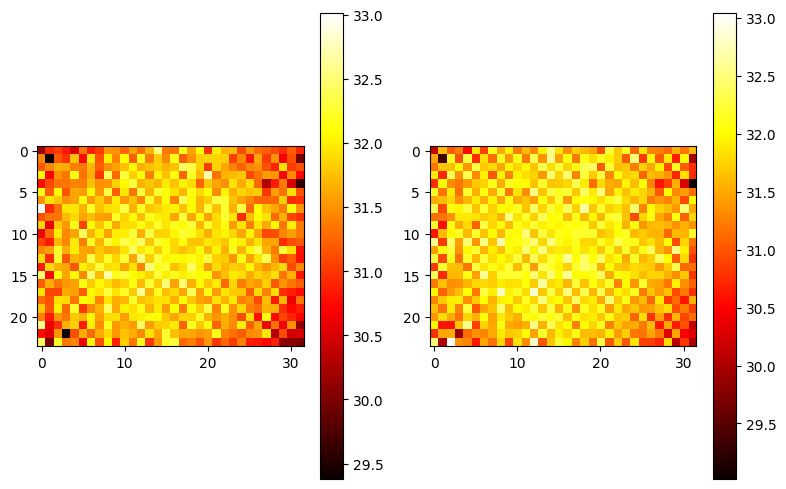

In [ ]:
thermal_data_1 = df.tmp1[668]+ df.tmp3[668]
thermal_data_2 = df.tmp2[668]+ df.tmp4[668]

# Function to split and convert thermal data
def process_thermal_data(thermal_data):
    # Use regular expression to split the data into individual temperature readings
    readings = re.findall(r'\d+\.\d{2}', thermal_data)
    # Convert readings to float, handle invalid entries and filter out-of-range values
    sensor_data = []
    for reading in readings:
        try:
            temperature = float(reading)
            if 0.01 <= temperature <= 99:
                sensor_data.append(temperature)
            else:
                print(temperature)
        except ValueError:
            print("Invalid data:", reading)
            sensor_data.append(np.nan)
    return sensor_data

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_1]][0]
arr1 = np.array(thermal_data_arrays).reshape(24,32)

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_2]][0]
arr2 = np.array(thermal_data_arrays).reshape(24,32)

print(arr1.shape)
print(arr2.shape)


###Plot and object near thermal camera

plt.figure(figsize=(8, 5))
# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(arr1, cmap='hot', interpolation='nearest')
plt.colorbar()
# plt.show()
plt.subplot(1, 2, 2)
plt.imshow(arr2, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale

plt.tight_layout()
plt.show()

(24, 32)
(24, 32)


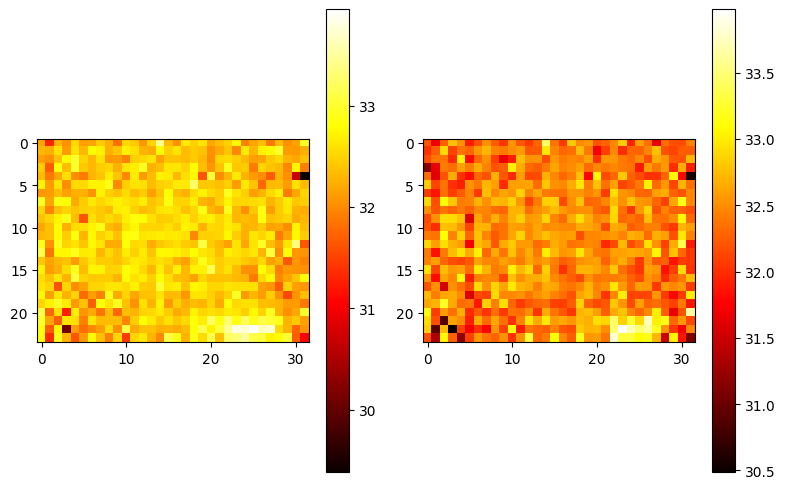

In [ ]:
thermal_data_1 = df.tmp1[640]+ df.tmp3[640]
thermal_data_2 = df.tmp2[640]+ df.tmp4[640]

# Function to split and convert thermal data
def process_thermal_data(thermal_data):
    # Use regular expression to split the data into individual temperature readings
    readings = re.findall(r'\d+\.\d{2}', thermal_data)
    # Convert readings to float, handle invalid entries and filter out-of-range values
    sensor_data = []
    for reading in readings:
        try:
            temperature = float(reading)
            if 0.01 <= temperature <= 99:
                sensor_data.append(temperature)
            else:
                print(temperature)
        except ValueError:
            print("Invalid data:", reading)
            sensor_data.append(np.nan)
    return sensor_data

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_1]][0]
arr1 = np.array(thermal_data_arrays).reshape(24,32)

thermal_data_arrays = [process_thermal_data(data) for data in [thermal_data_2]][0]
arr2 = np.array(thermal_data_arrays).reshape(24,32)

print(arr1.shape)
print(arr2.shape)


###Plot and object near thermal camera

plt.figure(figsize=(8, 5))
# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(arr1, cmap='hot', interpolation='nearest')
plt.colorbar()
# plt.show()
plt.subplot(1, 2, 2)
plt.imshow(arr2, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale

plt.tight_layout()
plt.show()